In [326]:
import numpy
import random

import qiskit
from qiskit import __version__
print(__version__)
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate   


2.1.2


Quantum Teleportation

In [327]:
qubit = QuantumRegister(1, "Q")
ebit_0 = QuantumRegister(1, "A")
ebit_1 = QuantumRegister(1, "B")

a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

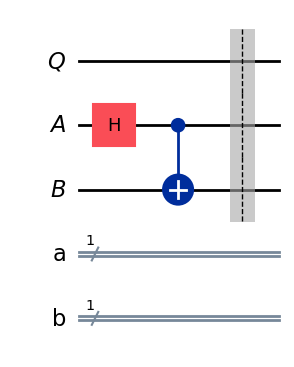

In [328]:
teleportation_protocol = QuantumCircuit(qubit, ebit_0, ebit_1, a, b)

# entangle ebit for teleportation
teleportation_protocol.h(ebit_0)
teleportation_protocol.cx(ebit_0, ebit_1)
teleportation_protocol.barrier()

teleportation_protocol.draw('mpl')


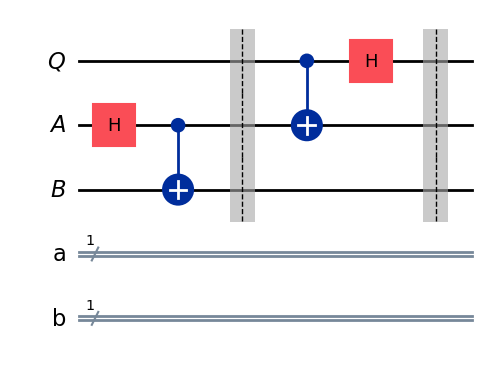

In [329]:
# Alice's Operations

teleportation_protocol.cx(qubit, ebit_0)
teleportation_protocol.h(qubit)
teleportation_protocol.barrier()

teleportation_protocol.draw('mpl')

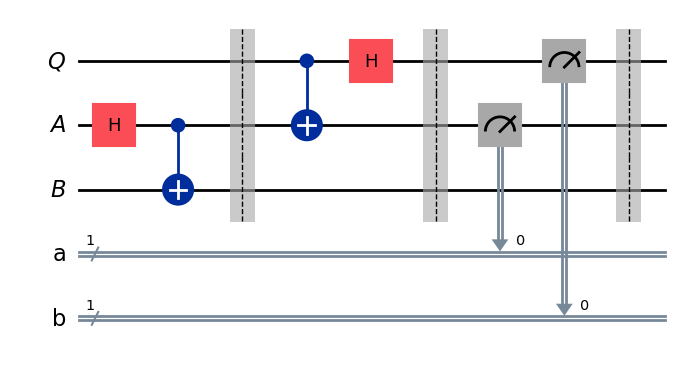

In [330]:
teleportation_protocol.measure(ebit_0, a)
teleportation_protocol.measure(qubit, b)

teleportation_protocol.barrier()

teleportation_protocol.draw('mpl')

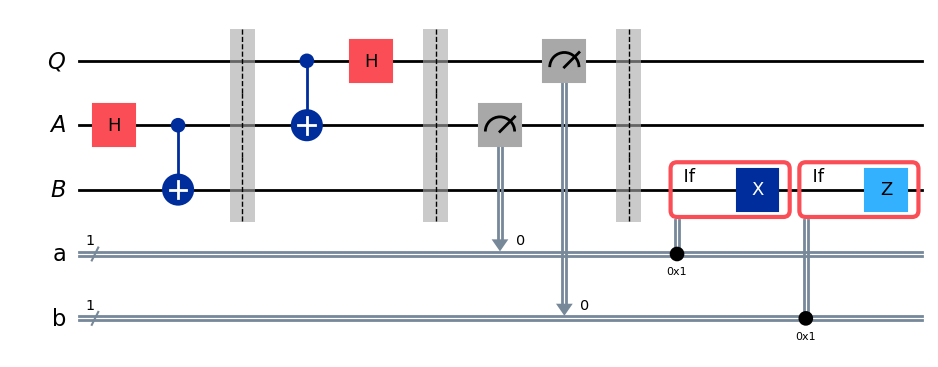

In [331]:
with teleportation_protocol.if_test((a, 1)):
    teleportation_protocol.x(ebit_1)
with teleportation_protocol.if_test((b, 1)):
    teleportation_protocol.z(ebit_1)

teleportation_protocol.draw('mpl')

Test w/ random gate applied to Q

In [332]:
random_gate = UGate(
    theta=random.random() * 2 * numpy.pi,
    phi=random.random() * 2 * numpy.pi,
    lam=random.random() * 2 * numpy.pi
)

random_gate.to_matrix()

array([[-0.06509416+0.j        , -0.99658938-0.05071837j],
       [ 0.03093154-0.99739961j, -0.00532203+0.06487623j]])

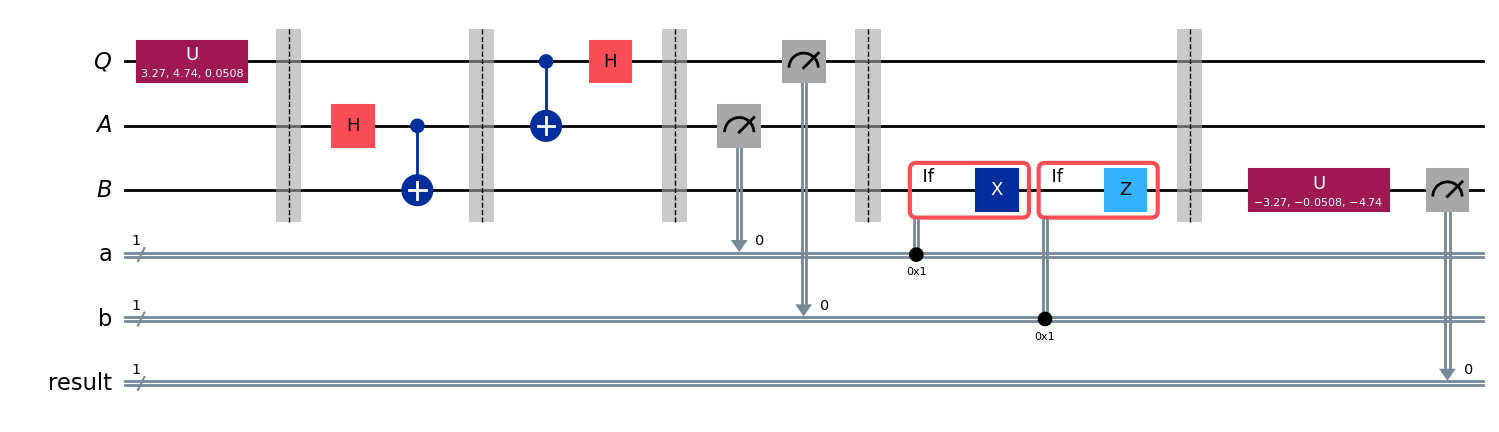

In [333]:
test = QuantumCircuit(qubit, ebit_0, ebit_1, a, b)

# apply gate to Q
test.append(random_gate, qubit)
test.barrier()

# add teleportation protocol
test = test.compose(teleportation_protocol)
test.barrier()

# apply inverse of the gate at the any and measure
test.append(random_gate.inverse(), ebit_1)

result = ClassicalRegister(1, 'result')
test.add_register(result)

test.measure(ebit_1, result)

test.draw('mpl')

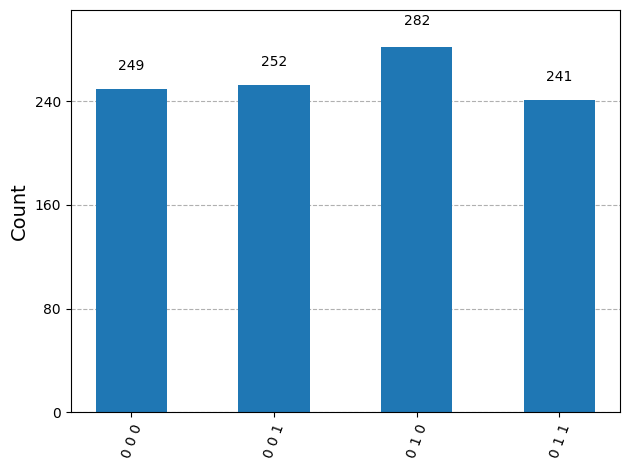

In [334]:
# Run protocol on Aer Simulator

result = AerSimulator().run(test).result()
stats = result.get_counts()

plot_histogram(stats)

Superdense Coding

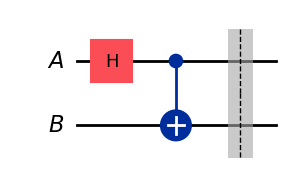

In [335]:
c = 1
d = 1

ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")

superdense_coding = QuantumCircuit(ebit0, ebit1)

superdense_coding.h(0)
superdense_coding.cx(0, 1)
superdense_coding.barrier()

superdense_coding.draw('mpl')

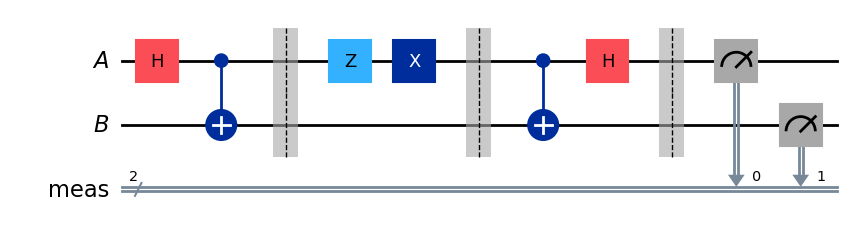

In [336]:

# apply alice's tests for the protocol
if d == 1:
    superdense_coding.z(0)
if c == 1:
    superdense_coding.x(0)
superdense_coding.barrier()

# bob's actions
superdense_coding.cx(0, 1)
superdense_coding.h(0)
superdense_coding.measure_all()

superdense_coding.draw('mpl')

measured 11 with frequency 1024


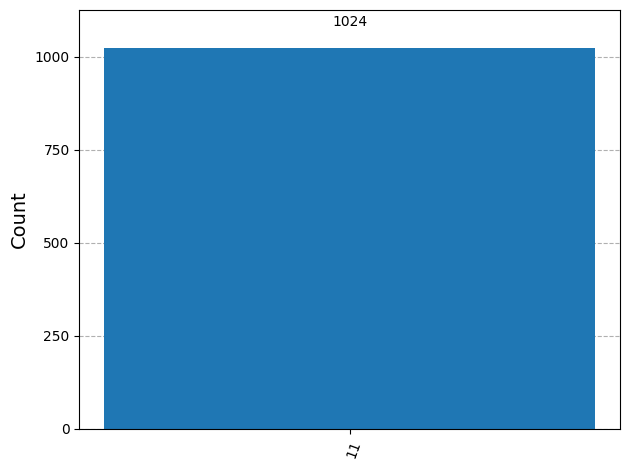

In [337]:
# test results

result = AerSimulator().run(superdense_coding).result()
stats = result.get_counts()

for outcome, freq in stats.items():
    print(f"measured {outcome} with frequency {freq}")

plot_histogram(stats)

CHSH Game

In [338]:
def chsh_game(strategy):

    x, y = random.choice([0, 1]), random.choice([0, 1])

    a, b = strategy(x, y)

    if (a != b) == (x and y):
        return 1
    return 0

In [339]:
def chsh_circuit(x, y):
    qc = QuantumCircuit(2, 2)
 
    # entangle ebit
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()
 
    # alice's actions
    if x == 0:
        qc.ry(0, 0)
    else:
        qc.ry(-numpy.pi / 2, 0)
    qc.measure(0, 0)
 
    # bob's actions
    if y == 0:
        qc.ry(-numpy.pi / 4, 1)
    else:
        qc.ry(numpy.
              pi / 4, 1)
    qc.measure(1, 1)
 
    return qc

(x,y) = (0,0)


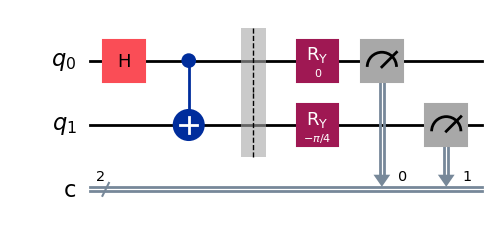

(x,y) = (0,1)


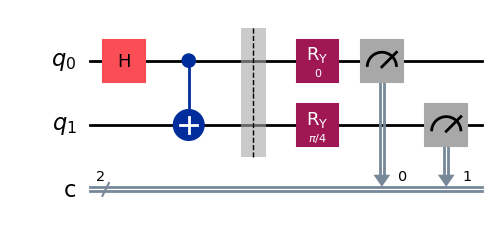

(x,y) = (1,0)


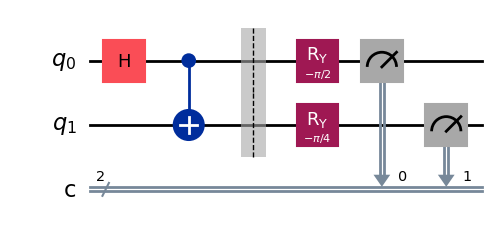

(x,y) = (1,1)


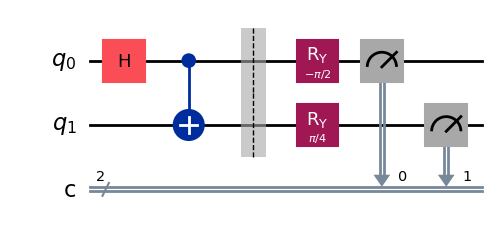

In [340]:
# Draw the four possible circuits
 
print("(x,y) = (0,0)")
display(chsh_circuit(0, 0).draw(output="mpl"))
 
print("(x,y) = (0,1)")
display(chsh_circuit(0, 1).draw(output="mpl"))
 
print("(x,y) = (1,0)")
display(chsh_circuit(1, 0).draw(output="mpl"))
 
print("(x,y) = (1,1)")
display(chsh_circuit(1, 1).draw(output="mpl"))

Quantum strategy

In [341]:
def quantum_strategy(x, y):

    # get result of a single run (shots==1)
    result = AerSimulator().run(chsh_circuit(x, y), shots=1).result()
    statistics = result.get_counts()
 
    # Determine the output bits and return them
    bits = list(statistics.keys())[0]
    a, b = bits[0], bits[1]
    return a, b

In [ ]:
NUM_GAMES = 1000
TOTAL_SCORE = 0
 
for _ in range(NUM_GAMES):
    TOTAL_SCORE += chsh_game(quantum_strategy)

print(f"Percent of games won: {TOTAL_SCORE / NUM_GAMES * 100} %")

Fraction of games won: 0.85
Percent of games won: 85.0 %


Classical Strategy

In [343]:
def classical_strategy(x, y):
 
    # alice's answer
    if x == 0:
        a = 0
    elif x == 1:
        a = 1
 
    # bob's answer
    if y == 0:
        b = 1
    elif y == 1:
        b = 0
 
    return a, b

In [ ]:
NUM_GAMES = 1000
TOTAL_SCORE = 0
 
for _ in range(NUM_GAMES):
    TOTAL_SCORE += chsh_game(classical_strategy)
    
print(f"Percent of games won: {TOTAL_SCORE / NUM_GAMES * 100} %")

Fraction of games won: 0.764
Percent of games won: 76.4 %
